In [1]:
import os
os.path
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import plotly.graph_objs as go
import math
%matplotlib inline

# my functions
import helpers.data_mining_helpers as dmh
import helpers.text_analysis as ta

2. Data Preparation

In [2]:
categories = ['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [217]:
my_file=open("amazon_cells_labelled.txt",'r')
content=my_file.read()

In [220]:
print(type(content))
print(len(content))

<class 'str'>
58226


In [228]:
s=np.array(content)
print(s)

0
So there is no way for me to plug it in here in the US unless I go by a converter.	0
Good case, Excellent value.	1
Great for the jawbone.	1
Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!	0
The mic is great.	1
I have to jiggle the plug to get it to line up right to get decent volume.	0
If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.	0
If you are Razr owner...you must have this!	1
Needless to say, I wasted my money.	0
What a waste of money and time!.	0
And the sound quality is great.	1
He was very impressed when going from the original battery to the extended battery.	1
If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.	0
Very good quality though	1
The design is very odd, as the ear "clip" is not very comfortable at all.	0
Highly recommend for any one who has a blue tooth phone.	1
I advise EVERYONE DO NOT BE FOOLED!	0
So Far So

In [8]:
#input data, change label's name
amazon_cells_labelled=pd.read_table("amazon_cells_labelled.txt",header = None)
imdb_labelled=pd.read_table("imdb_labelled.txt",header = None)
yelp_labelled=pd.read_table("yelp_labelled.txt",header = None)
amazon_cells_labelled.columns=['sentences','score']
imdb_labelled.columns=['sentences','score']
yelp_labelled.columns=['sentences','score']

In [218]:
len(amazon_cells_labelled)

pandas.core.frame.DataFrame

In [10]:
amazon_cells_labelled

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [11]:
## add category to the dataframe
amazon_cells_labelled["category"]='1'
amazon_cells_labelled['category_name']='amazon_cells_labelled'
imdb_labelled["category"]='2'
imdb_labelled['category_name']='imdb_labelled'
yelp_labelled["category"]='3'
yelp_labelled['category_name']='yelp_labelled'

In [13]:
#combine three data sets
combine=pd.concat([amazon_cells_labelled,imdb_labelled , yelp_labelled])
three_combine=pd.DataFrame(combine,columns=['sentences','score',"category",'category_name'])
print(combine)

                                             sentences  score category  \
0    So there is no way for me to plug it in here i...      0        1   
1                          Good case, Excellent value.      1        1   
2                               Great for the jawbone.      1        1   
3    Tied to charger for conversations lasting more...      0        1   
4                                    The mic is great.      1        1   
5    I have to jiggle the plug to get it to line up...      0        1   
6    If you have several dozen or several hundred c...      0        1   
7          If you are Razr owner...you must have this!      1        1   
8                  Needless to say, I wasted my money.      0        1   
9                     What a waste of money and time!.      0        1   
10                     And the sound quality is great.      1        1   
11   He was very impressed when going from the orig...      1        1   
12   If the two were seperated by a me

In [14]:
three_combine[0:10]

,sentences,score,category,category_name
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled
1,"Good case, Excellent value.",1,1,amazon_cells_labelled
2,Great for the jawbone.,1,1,amazon_cells_labelled
3,Tied to charger for conversations lasting more...,0,1,amazon_cells_labelled
4,The mic is great.,1,1,amazon_cells_labelled
5,I have to jiggle the plug to get it to line up...,0,1,amazon_cells_labelled
6,If you have several dozen or several hundred c...,0,1,amazon_cells_labelled
7,If you are Razr owner...you must have this!,1,1,amazon_cells_labelled
8,"Needless to say, I wasted my money.",0,1,amazon_cells_labelled
9,What a waste of money and time!.,0,1,amazon_cells_labelled


In [15]:
three_combine[0:11][['sentences','score']]

,sentences,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
5,I have to jiggle the plug to get it to line up...,0
6,If you have several dozen or several hundred c...,0
7,If you are Razr owner...you must have this!,1
8,"Needless to say, I wasted my money.",0
9,What a waste of money and time!.,0


In [16]:
three_combine[-11:-1]

,sentences,score,category,category_name
989,I would avoid this place if you are staying in...,0,3,yelp_labelled
990,The refried beans that came with my meal were ...,0,3,yelp_labelled
991,Spend your money and time some place else.,0,3,yelp_labelled
992,A lady at the table next to us found a live gr...,0,3,yelp_labelled
993,the presentation of the food was awful.,0,3,yelp_labelled
994,I can't tell you how disappointed I was.,0,3,yelp_labelled
995,I think food should have flavor and texture an...,0,3,yelp_labelled
996,Appetite instantly gone.,0,3,yelp_labelled
997,Overall I was not impressed and would not go b...,0,3,yelp_labelled
998,"The whole experience was underwhelming, and I ...",0,3,yelp_labelled


In [17]:
three_combine.iloc[::10, :][0:10]

,sentences,score,category,category_name
0,So there is no way for me to plug it in here i...,0,1,amazon_cells_labelled
10,And the sound quality is great.,1,1,amazon_cells_labelled
20,I went on Motorola's website and followed all ...,0,1,amazon_cells_labelled
30,"This is a simple little phone to use, but the ...",0,1,amazon_cells_labelled
40,"It has a great camera thats 2MP, and the pics ...",1,1,amazon_cells_labelled
50,Not loud enough and doesn't turn on like it sh...,0,1,amazon_cells_labelled
60,Essentially you can forget Microsoft's tech su...,0,1,amazon_cells_labelled
70,Mic Doesn't work.,0,1,amazon_cells_labelled
80,I wear it everyday and it holds up very well.,1,1,amazon_cells_labelled
90,For a product that costs as much as this one d...,0,1,amazon_cells_labelled


In [18]:
three_combine.isnull()

,sentences,score,category,category_name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [19]:
three_combine.apply(lambda x: dmh.check_missing_values(x))

sentences           (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 1386)
category            (The amoung of missing records is: , 0)
category_name       (The amoung of missing records is: , 0)
dtype: object

In [20]:
#calculate the missing values for every record instead of every column. 
three_combine.apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 1)
2      (The amoung of missing records is: , 1)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 1)
5      (The amoung of missing records is: , 0)
6      (The amoung of missing records is: , 0)
7      (The amoung of missing records is: , 1)
8      (The amoung of missing records is: , 0)
9      (The amoung of missing records is: , 0)
10     (The amoung of missing records is: , 1)
11     (The amoung of missing records is: , 1)
12     (The amoung of missing records is: , 0)
13     (The amoung of missing records is: , 1)
14     (The amoung of missing records is: , 0)
15     (The amoung of missing records is: , 1)
16     (The amoung of missing records is: , 0)
17     (The amoung of missing records is: , 1)
18     (The amoung of missing records is: , 1)
19     (The amoung of missing records is: , 0)
20     (The amoung of missing records is: , 0)
21     (The a

In [21]:
dummy_series = pd.Series(["dummy_record", 1,3], index=['sentences','score','category'])

In [22]:
dummy_series

sentences    dummy_record
score                   1
category                3
dtype: object

In [23]:
result_with_series = three_combine.append(dummy_series, ignore_index=True)

In [24]:
# check if the records was commited into result
len(result_with_series)

2749

In [25]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [26]:
dummy_dict = [{'sentences': 'dummy_record',
               'category': 1
              }]

In [27]:
three_combine = three_combine.append(dummy_dict,ignore_index=True)

In [28]:
len(three_combine)

2749

In [29]:
three_combine.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 1)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 1)
dtype: object

In [30]:
three_combine.dropna(inplace=True)

In [31]:
three_combine.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences        (The amoung of missing records is: , 0)
score            (The amoung of missing records is: , 0)
category         (The amoung of missing records is: , 0)
category_name    (The amoung of missing records is: , 0)
dtype: object

In [32]:
three_combine.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2718    False
2719    False
2720    False
2721    False
2722    False
2723    False
2724    False
2725    False
2726    False
2727    False
2728    False
2729    False
2730    False
2731    False
2732    False
2733    False
2734    False
2735    False
2736    False
2737    False
2738    False
2739    False
2740    False
2741    False
2742    False
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [33]:
sum(three_combine.duplicated())

17

In [34]:
sum(three_combine.duplicated('sentences'))

17

In [35]:
three_combine.drop_duplicates(keep=False, inplace=True)

In [36]:
len(three_combine)

2714

In [37]:
#sample
X=three_combine
X_sample = three_combine.sample(n=1000)

In [38]:
len(X_sample)

1000

In [39]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [40]:
X_category_counts = ta.get_tokens_and_frequency(list(X.category_name))
X_sample_category_counts = ta.get_tokens_and_frequency(list(X_sample.category_name))

In [41]:
py.offline.init_notebook_mode(connected=True)

In [42]:
py.offline.iplot(ta.plot_word_frequency(X_category_counts, "Category distribution"))

In [43]:
py.offline.iplot(ta.plot_word_frequency(X_sample_category_counts, "Category distribution"))

In [44]:
#Exercise
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['amazon_cells_labelled', 'yelp_labelled', 'imdb_labelled'],
    y=[980,992,742],
    name='Original'
)
trace2 = go.Bar(
    x=['amazon_cells_labelled', 'yelp_labelled', 'imdb_labelled'],
    y=[373,355,272],
    name='Sample'
)

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='grouped-bar')


In [45]:
X_category_counts

(odict_keys(['yelp_labelled', 'amazon_cells_labelled', 'imdb_labelled']),
 odict_values([992, 980, 742]))

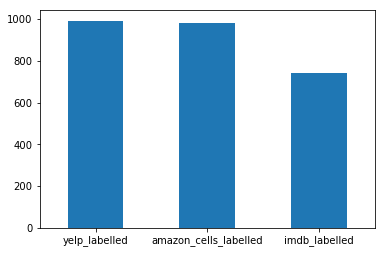

In [46]:
X.category_name.value_counts().plot(kind="bar", rot=0)

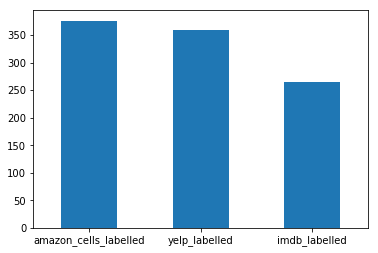

In [47]:
X_sample.category_name.value_counts().plot(kind="bar", rot=0)

In [48]:
import nltk

"""
Helper functions for data mining lab session 2017 Fall

Notations:
d - document
D - documents
V - vowels
w - word
W - words
l - letter
"""

def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens


In [49]:
# takes a like a minute or two to process
import nltk
X['unigrams'] = X['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [50]:
X[0:4]

,sentences,score,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0.0,1,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,1,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."


In [51]:
list(X[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [52]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentences)

In [184]:
analyze = count_vect.build_analyzer()
analyze(" ".join(list(X[4:10].sentences)))

['the',
 'mic',
 'is',
 'great',
 'have',
 'to',
 'jiggle',
 'the',
 'plug',
 'to',
 'get',
 'it',
 'to',
 'line',
 'up',
 'right',
 'to',
 'get',
 'decent',
 'volume',
 'if',
 'you',
 'have',
 'several',
 'dozen',
 'or',
 'several',
 'hundred',
 'contacts',
 'then',
 'imagine',
 'the',
 'fun',
 'of',
 'sending',
 'each',
 'of',
 'them',
 'one',
 'by',
 'one',
 'if',
 'you',
 'are',
 'razr',
 'owner',
 'you',
 'must',
 'have',
 'this',
 'needless',
 'to',
 'say',
 'wasted',
 'my',
 'money',
 'what',
 'waste',
 'of',
 'money',
 'and',
 'time']

In [183]:
X_counts.shape

(2714, 5153)

In [55]:
# We can obtain the feature names of the vectorizer, i.e., the terms
count_vect.get_feature_names()[0:50]

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '15',
 '15g',
 '15pm',
 '17',
 '18',
 '18th',
 '1928',
 '1947',
 '1948',
 '1949',
 '1971',
 '1973',
 '1979',
 '1980',
 '1986',
 '1995',
 '1998',
 '20',
 '2000',
 '2005',
 '2006',
 '2007',
 '20th',
 '2160',
 '23',
 '24',
 '25',
 '2mp',
 '30',
 '30s',
 '325',
 '35',
 '350',
 '375',
 '3o',
 '40',
 '40min',
 '42',
 '44',
 '45',
 '4s',
 '4ths',
 '50',
 '5020']

In [56]:
X[0:5]

,sentences,score,category,category_name,unigrams
0,So there is no way for me to plug it in here i...,0.0,1,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1.0,1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1.0,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0.0,1,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1.0,1,amazon_cells_labelled,"[The, mic, is, great, .]"


In [57]:
type(X)

pandas.core.frame.DataFrame

In [58]:
X_counts[0:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [59]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [60]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [91]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:200]]
plot_z = X_counts[0:200, 0:200].toarray()

# to plot
py.offline.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))


In [61]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()]

In [62]:
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980',
 'term_1986',
 'term_1995',
 'term_1998',
 'term_20',
 'term_2000',
 'term_2005',
 'term_2006',
 'term_2007',
 'term_20th',
 'term_2160',
 'term_23',
 'term_24',
 'term_25',
 'term_2mp',
 'term_30',
 'term_30s',
 'term_325',
 'term_35',
 'term_350',
 'term_375',
 'term_3o',
 'term_40',
 'term_40min',
 'term_42',
 'term_44',
 'term_45',
 'term_4s',
 'term_4ths',
 'term_50',
 'term_5020',
 'term_510',
 'term_5320',
 'term_54',
 'term_5lb',
 'term_680',
 'term_70',
 'term_70000',
 'term_700w',
 'term_70s',
 'term_80',
 'term_80s',
 'term_8125',
 'term_85',
 'term_8525',
 'term_8530',
 'term_8pm',
 'term_90',
 'term_95',
 'term_99',
 'term_aailiyah',
 'term_abandoned',
 'term_abhor',
 'term_ability',
 'term_able',
 'term_abound',
 '

In [63]:
plot_y = ["doc_"+ str(i) for i in list(X.index)]

In [64]:
plot_z = X_counts.toarray()

In [108]:
# Exercise--plot this one sometimes may cause sys crash
py.offline.iplot(ta.plot_heat_map(plot_x, plot_y, plot_z))

5.4 Dimensionality Reduction

In [92]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components=3).fit_transform(X_counts.toarray())
X_reduced.shape

(2714, 3)

In [93]:
categories

['amazon_cells_labelled', 'imdb_labelled', 'yelp_labelled']

In [94]:
trace1 = ta.get_trace(X_reduced, X["category_name"], "amazon_cells_labelled", "rgb(71,233,163)")
trace2 = ta.get_trace(X_reduced, X["category_name"], "imdb_labelled", "rgb(52,133,252)")
trace3 = ta.get_trace(X_reduced, X["category_name"], "yelp_labelled", "rgb(229,65,136)")

In [95]:
data = [trace1, trace2, trace3]

In [ ]:
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='simple-3d-scatter')

5.5 Atrribute Transformation / Aggregation

In [189]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [191]:
term_frequencies[0]
term_frequencies_1 = [math.pow(i,1) for i in term_frequencies]

In [192]:
py.offline.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_1], "Term Frequency Distribution"))

In [204]:
#Exercise
pairs=[(term_frequencies,count_vect.get_feature_names())]
pairs.sort(reverse=True)
c={"a" : term_frequencies_1,
   "b" : count_vect.get_feature_names()}
df=pd.DataFrame(c)
df1=data.sort_values(["a"],ascending=False)
term_frequencies_2=list(df1["a"])
feature_names=list(df1["b"])
py.offline.iplot(ta.plot_word_frequency([feature_names, term_frequencies_2], "Term Frequency Distribution"))

In [106]:
term_frequencies_log = [math.log(i) for i in term_frequencies]

In [107]:
py.offline.iplot(ta.plot_word_frequency([count_vect.get_feature_names(), term_frequencies_log], "Term Frequency Distribution"))

In [206]:
#
term_frequencies_log_2 = [math.log(i) for i in term_frequencies_2]
py.offline.iplot(ta.plot_word_frequency([feature_names, term_frequencies_log_2], "Term Frequency Distribution"))

5.6 Discretization and Binarization

In [99]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [101]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [102]:
mlb.classes_

array(['1', '2', '3'], 
      dtype='<U1')

In [103]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [104]:
X[0:9]

,sentences,score,category,category_name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0.0,1,amazon_cells_labelled,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1.0,1,amazon_cells_labelled,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1.0,1,amazon_cells_labelled,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0.0,1,amazon_cells_labelled,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1.0,1,amazon_cells_labelled,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0.0,1,amazon_cells_labelled,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0.0,1,amazon_cells_labelled,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1.0,1,amazon_cells_labelled,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0.0,1,amazon_cells_labelled,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"
